# Case study on Pre-processing

Do the following on titanic dataset.

1. Load the dataset into python environment

2. Make ‘PassengerId’ as the index column

3. Check the basic details of the dataset

4. Fill in all the missing values present in all the columns in the dataset

5. Check and handle outliers in at least 3 columns in the dataset

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load the dataset into python environment

In [5]:
data = pd.read_csv('titanic_dataset.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Make ‘PassengerId’ as the index column

In [7]:
data = pd.read_csv('titanic_dataset.csv',index_col='PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 3. Check the basic details of the dataset

In [8]:
# To know  statistical summary of integer datatype columns 
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# TO find the shape of data
data.shape

(891, 11)

In [12]:
# To print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
# Checking for null values
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
data=data.drop(['Cabin'],axis=1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S


### Findings

### Gender wise analysis

Text(0.5, 1.0, 'Gender wise analysis of passengers')

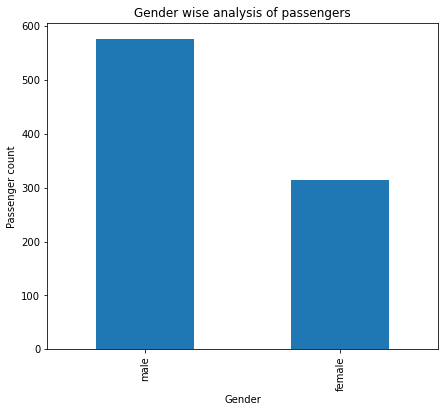

In [19]:
data['Sex'].value_counts().plot(kind='bar',figsize=(7,6))
plt.xlabel("Gender")
plt.ylabel("Passenger count")
plt.title("Gender wise analysis of passengers")

### Age vs Survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

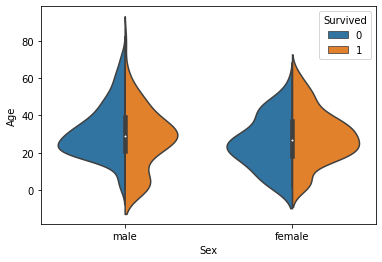

In [23]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = data, split = True)

## 4. Fill in all the missing values present in all the columns in the dataset

In [24]:
#Search for missing values.if there is any thing which has not 0 as its number there is missing value
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [25]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

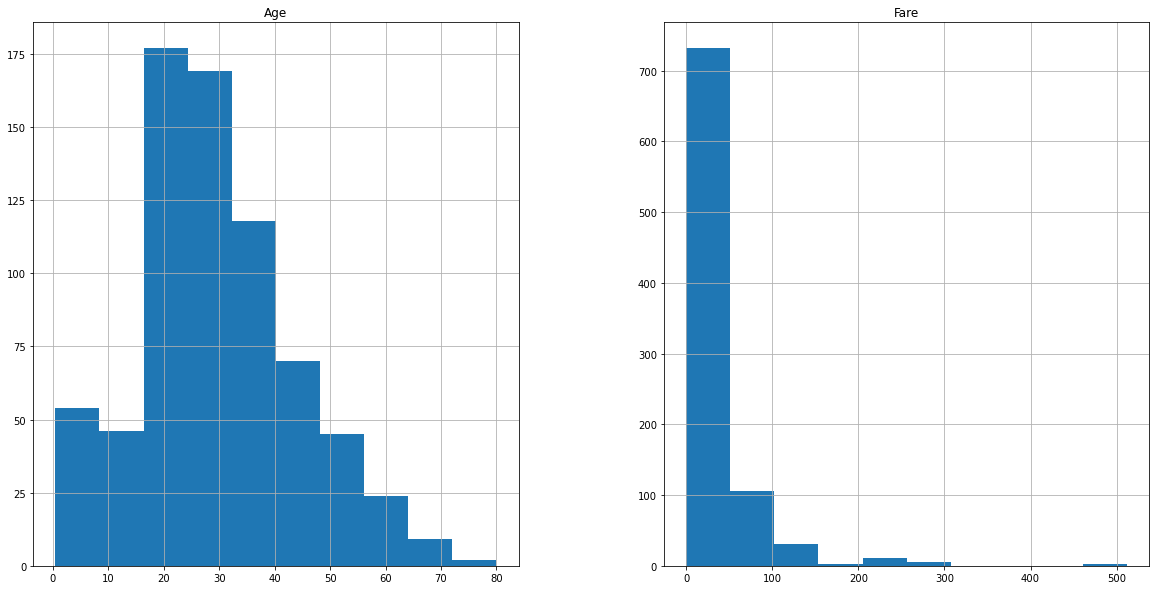

In [29]:
#If there is missing value
#data.dtypes
#Check skewness with frqgraph
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,10))
plt.show

In [30]:
#If the modal is right skewed so we can fill value by median of each column
#here in case of Age
data['Age'] = data['Age'].fillna(data['Age'].median())

In [31]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [37]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [35]:
data.Embarked.nunique()

3

In [38]:
#There is a column with null values and that is categorical column so we remove them from the data set because of categorical value
data.drop('Embarked',axis = 1, inplace=True)

In [39]:
data.isna().sum()
#Now there is no missing values

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

## 5. Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Box plot of SibSp')

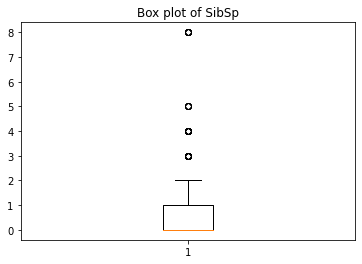

In [40]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [41]:
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')

In [42]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [43]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ", low_lim)
print("Upper limit = ", up_lim)

Lower limit =  -1.5
Upper limit =  2.5


In [44]:
outlier = []
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [45]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [46]:
ind1 = data['SibSp']>up_lim
data.loc[ind1].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [47]:
data.drop([ 8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864], inplace = True)

Text(0.5, 1.0, 'Box plot of SibSP after handling outliers')

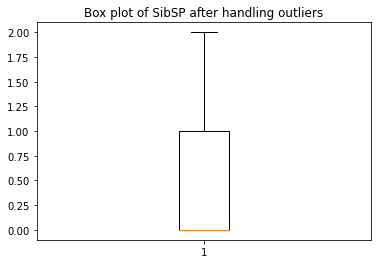

In [48]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSP after handling outliers')

### Checking and handling outliers in Age

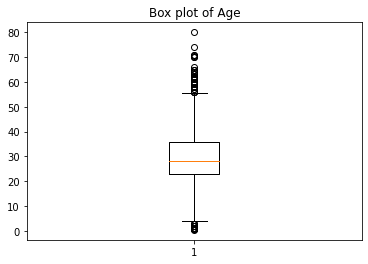

In [49]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

In [50]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [51]:
print(Q1)
print(Q2)
print(Q3)

23.0
28.0
36.0


In [52]:
data['Age'].median()

28.0

In [53]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ", low_lim)
print("Upper limit = ", up_lim)

Lower limit =  3.5
Upper limit =  55.5


In [54]:
outlier = []
for x in data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [55]:
outlier

[58.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 3.0,
 60.0,
 1.0,
 3.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [56]:
ind1 = data['Age']>up_lim
data.loc[ind1].index

Int64Index([ 12,  34,  55,  95,  97, 117, 171, 175, 196, 233, 253, 269, 276,
            281, 327, 367, 439, 457, 468, 484, 488, 494, 546, 556, 571, 588,
            626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880],
           dtype='int64', name='PassengerId')

In [57]:
data.drop([ 12,  34,  55,  95,  97, 117, 171, 175, 196, 233, 253, 269, 276,
            281, 327, 367, 439, 457, 468, 484, 488, 494, 546, 556, 571, 588,
            626, 627, 631, 648, 660, 673, 685, 695, 746, 773, 830, 852, 880], inplace = True)

Text(0.5, 1.0, 'Box plot of Age after handling outliers')

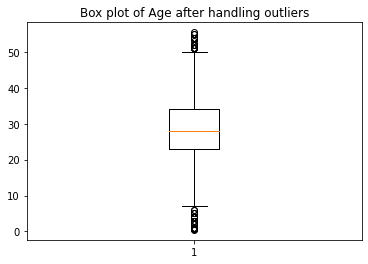

In [58]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age after handling outliers')

## Checking and handling outliers in Fare

Text(0.5, 1.0, 'Box plot of Fare')

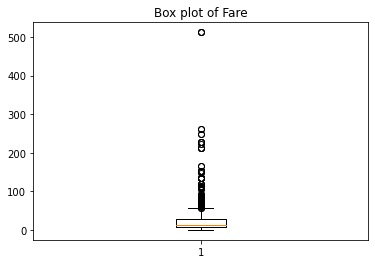

In [59]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [60]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')

In [61]:
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.825


In [62]:
data['Fare'].median()

13.0

In [63]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print("Lower limit = ", low_lim)
print("Upper limit = ", up_lim)

Lower limit =  -21.997999999999998
Upper limit =  57.7188


In [64]:
outlier = []
for x in data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [65]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [66]:
ind1 = data['Fare']>up_lim
data.loc[ind1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=104)

In [67]:
data.drop([ 2, 32, 35, 53, 62, 63, 73, 93, 98, 103, 119, 121, 125, 140, 152, 156, 216, 219, 
           225, 231, 246, 257, 258, 259, 263, 270, 291, 292, 298, 300, 306, 307, 308, 311, 
           312, 319, 320, 326, 330, 333, 335, 337, 338, 370, 374, 376, 378, 381, 386, 391, 
           394, 413, 436, 446, 454, 485, 487, 497, 499, 505, 506, 514, 521, 524, 528, 538, 
           541, 545, 551, 558, 559, 582, 586, 592, 610, 616, 628, 642, 646, 656, 661, 666, 
           680, 682, 690, 699, 701, 709, 717, 731, 738, 742, 743, 755, 760, 764, 766, 780, 
           790, 803, 821, 836, 850, 857], inplace = True)

Text(0.5, 1.0, 'Box plot of Fare after handling outliers')

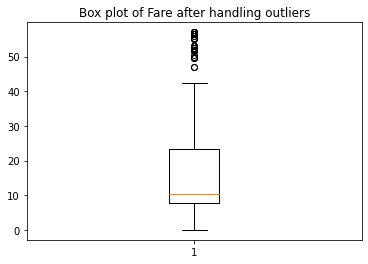

In [68]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare after handling outliers')

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [69]:
y=data['Survived']
x=data.drop('Survived',axis=1)

In [70]:
x= x.describe()

In [71]:
x

,Pclass,Age,SibSp,Parch,Fare
count,702.000000,702.000000,702.000000,702.000000,702.000000
mean,2.502849,28.139245,0.282051,0.287749,16.414606
std,0.712127,10.282928,0.512544,0.762789,12.547668
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.250000,0.000000,0.000000,7.879200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,1.000000,0.000000,23.250000
max,3.000000,55.500000,2.000000,6.000000,57.000000


In [72]:
from numpy import asarray
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [73]:
type(x)

pandas.core.frame.DataFrame

In [74]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [75]:
x = min_max.fit_transform(x)

In [76]:
x = pd.DataFrame(x)

In [77]:
x.describe()

,0,1,2,3,4
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.126823,0.156118,0.125676,0.126255,0.147719
std,0.352819,0.341762,0.353282,0.353058,0.345241
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001480,0.026851,0.000000,0.000000,0.014024
50%,0.002908,0.039411,0.000566,0.000205,0.020628
75%,0.003262,0.054456,0.001781,0.002952,0.045139
max,1.000000,1.000000,1.000000,1.000000,1.000000
